In [218]:
# CNN Architecture used : InceptionV3
import tensorflow as tf

In [194]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

import tensorflow as tf

import numpy as np
from glob import glob

In [195]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Covid19-dataset/train'
valid_path = '/content/drive/MyDrive/Covid19-dataset/test'

In [196]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [197]:
for layer in inception.layers:
  layer.trainable = False

In [198]:
folders = glob('/content/drive/MyDrive/Covid19-dataset/train/*')

In [199]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [200]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [201]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [206]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Covid19-dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 249 images belonging to 3 classes.


In [207]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Covid19-dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [208]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 0.3450 - accuracy: 0.9237 - val_loss: 0.4028 - val_accuracy: 0.9385
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 0.1927 - accuracy: 0.9518 - val_loss: 1.2859 - val_accuracy: 0.8308
Epoch 3/10
8/8 [==============================] - 15s 2s/step - loss: 0.2827 - accuracy: 0.9438 - val_loss: 1.7897 - val_accuracy: 0.7538
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 0.2868 - accuracy: 0.9438 - val_loss: 0.8301 - val_accuracy: 0.8462
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.3502 - accuracy: 0.9518 - val_loss: 1.0262 - val_accuracy: 0.8154
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 0.2284 - accuracy: 0.9558 - val_loss: 1.4345 - val_accuracy: 0.7692
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 0.2052 - accuracy: 0.9558 - val_loss: 0.7089 - val_accuracy: 0.8769
Epoch 8/10
8/8 [==================

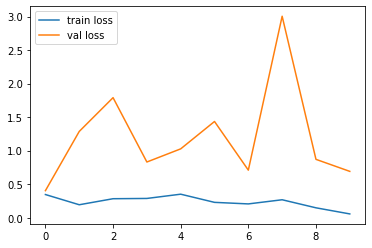

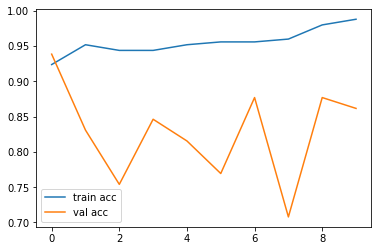

In [209]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show
plt.savefig('AccVal_acc')

In [210]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [211]:
y_pred = model.predict(test_set)

3/3 [==============================] - 3s 386ms/step


In [212]:
y_pred

array([[9.99996543e-01, 1.45546370e-15, 3.40220117e-06],
       [6.68524035e-06, 5.05630233e-05, 9.99942780e-01],
       [2.51558777e-02, 1.44914296e-02, 9.60352719e-01],
       [5.13842916e-20, 9.95573997e-01, 4.42600111e-03],
       [2.60721612e-16, 9.57149684e-01, 4.28503528e-02],
       [5.24494052e-03, 2.91888388e-11, 9.94755030e-01],
       [1.48088012e-20, 9.74817395e-01, 2.51825657e-02],
       [1.00000000e+00, 6.35997490e-24, 6.40231039e-15],
       [1.00000000e+00, 3.11925466e-19, 1.74692315e-18],
       [9.71640646e-01, 2.79645156e-02, 3.94811272e-04],
       [1.00000000e+00, 2.69852351e-18, 3.32474381e-16],
       [1.89460535e-13, 7.02560723e-01, 2.97439247e-01],
       [2.09835940e-10, 4.32199749e-06, 9.99995708e-01],
       [1.38906964e-09, 4.50756261e-03, 9.95492458e-01],
       [3.18400618e-11, 1.00000000e+00, 1.90982993e-12],
       [1.00000000e+00, 2.91832218e-11, 1.30313963e-11],
       [5.97511537e-12, 1.99521154e-01, 8.00478816e-01],
       [7.99243619e-14, 1.31372

In [214]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [215]:
model=load_model('model_inception.h5')

In [219]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

1/1 [==============================] - 1s 1s/step
1
Covid


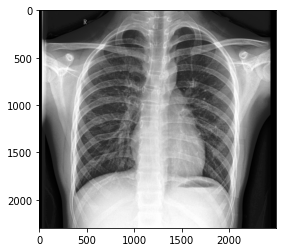

In [221]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic1.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic1.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 22ms/step
1
Covid


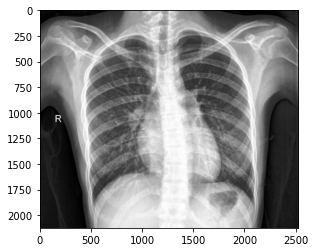

In [222]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic10.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic10.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 24ms/step
0
Normal


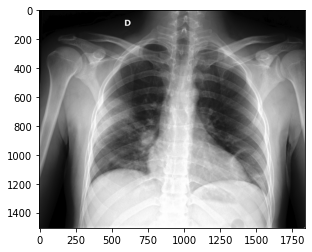

In [223]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic2.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic2.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 24ms/step
2
Viral Pneumonia


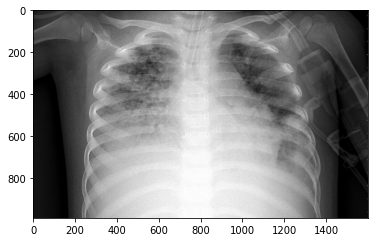

In [224]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic3.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic3.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 22ms/step
2
Viral Pneumonia


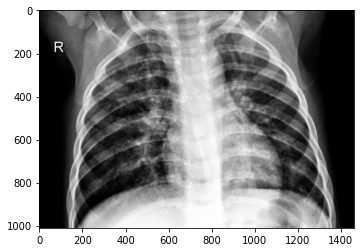

In [225]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic4.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic4.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 24ms/step
1
Covid


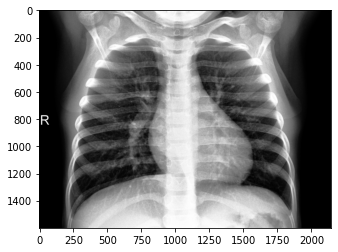

In [226]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic5.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic5.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 23ms/step
0
Normal


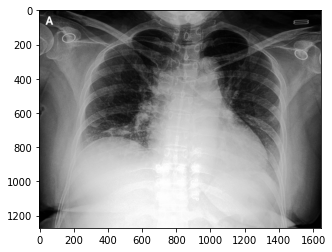

In [227]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic6.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic6.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 25ms/step
0
Normal


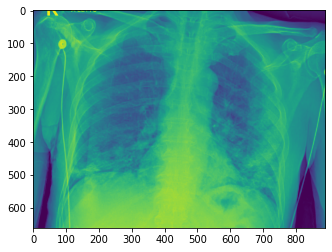

In [228]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic7.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic7.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 32ms/step
2
Viral Pneumonia


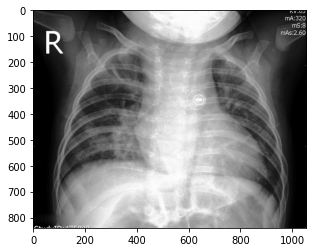

In [229]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic8.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic8.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")

1/1 [==============================] - 0s 25ms/step
0
Normal


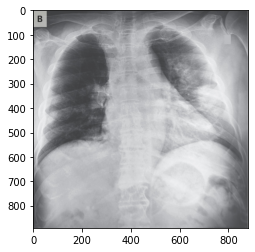

In [230]:
img_test = cv2.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic9.jpeg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'/content/drive/MyDrive/Covid19-dataset/validation/pic9.jpeg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
  print("Normal")
elif input_label == 1:
  print("Covid")
elif input_label == 2:
  print("Viral Pneumonia")